# Part A: Subreddit Prediction #

In [0]:
subreddit_train = "coursework_subreddit_train.json"
subreddit_validation = "coursework_subreddit_validation.json"
subreddit_test = "coursework_subreddit_test.json"

!gsutil cp gs://textasdata/coursework/coursework_subreddit_train2020.json $subreddit_train 
!gsutil cp gs://textasdata/coursework/coursework_subreddit_validation2020.json $subreddit_validation 
!gsutil cp gs://textasdata/coursework/coursework_subreddit_test.json  $subreddit_test

Copying gs://textasdata/coursework/coursework_subreddit_train2020.json...
- [1 files][  8.0 MiB/  8.0 MiB]                                                
Operation completed over 1 objects/8.0 MiB.                                      
Copying gs://textasdata/coursework/coursework_subreddit_validation2020.json...
- [1 files][  2.1 MiB/  2.1 MiB]                                                
Operation completed over 1 objects/2.1 MiB.                                      
Copying gs://textasdata/coursework/coursework_subreddit_test.json...
- [1 files][  2.7 MiB/  2.7 MiB]                                                
Operation completed over 1 objects/2.7 MiB.                                      


Train Dataset

In [0]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Train Dataset
train_threads = pd.read_json(path_or_buf=subreddit_train, lines=True)
print(list(train_threads.columns.values))
print(train_threads.head())
print(train_threads.size)

['is_self_post', 'posts', 'subreddit', 'title', 'url']
   is_self_post  ...                                                url
0           1.0  ...  https://www.reddit.com/r/relationships/comment...
1           1.0  ...  https://www.reddit.com/r/AskReddit/comments/22...
2           1.0  ...  https://www.reddit.com/r/trees/comments/46d0iu...
3           1.0  ...  https://www.reddit.com/r/AskReddit/comments/19...
4           1.0  ...  https://www.reddit.com/r/explainlikeimfive/com...

[5 rows x 5 columns]
5820


Validation Dataset

In [0]:

# Validation Dataset
validation_threads = pd.read_json(path_or_buf=subreddit_validation, lines=True)
print(list(validation_threads.columns.values))
print(validation_threads.head())
print(validation_threads.size)

['is_self_post', 'posts', 'subreddit', 'title', 'url']
   is_self_post  ...                                                url
0           1.0  ...  https://www.reddit.com/r/hearthstone/comments/...
1           1.0  ...  https://www.reddit.com/r/explainlikeimfive/com...
2           1.0  ...  https://www.reddit.com/r/AskReddit/comments/tl...
3           1.0  ...  https://www.reddit.com/r/AskReddit/comments/22...
4           1.0  ...  https://www.reddit.com/r/reddit.com/comments/f...

[5 rows x 5 columns]
1460


Test Dataset

In [0]:
test_threads = pd.read_json(path_or_buf=subreddit_test, lines=True)
print(test_threads.head())
print(test_threads.size)

   is_self_post  ...                                                url
0           1.0  ...  https://www.reddit.com/r/starcraft/comments/mq...
1           1.0  ...  https://www.reddit.com/r/whowouldwin/comments/...
2           1.0  ...  https://www.reddit.com/r/AskReddit/comments/27...
3           1.0  ...  https://www.reddit.com/r/AskReddit/comments/x9...
4           1.0  ...  https://www.reddit.com/r/tipofmytongue/comment...

[5 rows x 5 columns]
1825


In [0]:
subreddit_counts = train_threads['subreddit'].value_counts()
print(subreddit_counts.describe())
top_subbreddits = subreddit_counts.nlargest(20)
top_subbreddits_list = top_subbreddits.index.tolist()
print(top_subbreddits)

count     20.000000
mean      58.200000
std       60.248258
min       20.000000
25%       28.750000
50%       38.500000
75%       49.500000
max      276.000000
Name: subreddit, dtype: float64
askreddit               276
leagueoflegends         157
buildapc                103
explainlikeimfive        60
gaming                   51
trees                    49
techsupport              48
pcmasterrace             47
electronic_cigarette     46
relationships            42
tipofmytongue            35
summonerschool           33
jailbreak                31
hearthstone              30
whowouldwin              29
atheism                  28
personalfinance          27
reddit.com               27
movies                   25
starcraft                20
Name: subreddit, dtype: int64


In [0]:
train_labels = train_threads['subreddit']
validation_labels = validation_threads['subreddit']
test_labels = test_threads['subreddit']

In [0]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['ner'])

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##Q1

Data preparing, to add features like ids of the authors and the bodies of all the posts

In [0]:
 def extract_features(dataset):
  i = 0
  post_ids = []
  post_bodies = []
  post_depths = []
  for posts in dataset['posts']:
    ids = []
    bodies = [] 
    depths = [] 
    for sub_posts in posts:
      ids.append(sub_posts['id'])
      if('body' in sub_posts):
        bodies.append(sub_posts['body'])
      if('post_depth' in sub_posts):
        depths.append(sub_posts['post_depth'])
    post_ids.append(ids)
    post_bodies.append(bodies)
    post_depths.append(depths)
    i += 1
    

  dataset['all_posts_ids'] = post_ids
  dataset['all_posts_bodies'] = post_bodies
  dataset['all_posts_depths'] = post_depths

In [0]:
extract_features(train_threads)
extract_features(validation_threads)
extract_features(test_threads)

In [0]:
def listToString(s):  
    str1 = ""  
    for ele in s:  
        str1 += ele   
    return str1  

k = 0
for i in train_threads['all_posts_bodies']:
  train_threads['all_posts_bodies'][k] = listToString(train_threads['all_posts_bodies'][k])
  train_threads['all_posts_ids'][k] = listToString(train_threads['all_posts_ids'][k])
  # train_threads['all_posts_depths'][k] = listToString(train_threads['all_posts_depths'][k])
  k += 1

k = 0
for i in validation_threads['all_posts_bodies']:
  validation_threads['all_posts_bodies'][k] = listToString(validation_threads['all_posts_bodies'][k])
  validation_threads['all_posts_ids'][k] = listToString(validation_threads['all_posts_ids'][k])
  # validation_threads['all_posts_depths'][k] = listToString(validation_threads['all_posts_depths'][k])
  k += 1

k = 0
for i in test_threads['all_posts_bodies']:
  test_threads['all_posts_bodies'][k] = listToString(test_threads['all_posts_bodies'][k])
  test_threads['all_posts_ids'][k] = listToString(test_threads['all_posts_ids'][k])
  # test_threads['all_posts_depths'][k] = listToString(test_threads['all_posts_depths'][k])
  k += 1

Tokenize and normalize functions

In [0]:
def spacy_tokenize(string):
  tokens = list()
  doc = nlp(string)
  for token in doc:
    tokens.append(token)
  return tokens

def normalize(tokens):
  normalized_tokens = list()
  for token in tokens:
    normalized = token.text.lower().strip()
    if ((token.is_alpha or token.is_digit)):
      normalized_tokens.append(normalized)
  return normalized_tokens
  return normalized_tokens

def tokenize_normalize(string):
  return normalize(spacy_tokenize(string))

Combine Features


In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.    """

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

In [0]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Use FeatureUnion to combine the features from text and summary
# One hot
prediction_pipeline = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('text', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('one-hot', CountVectorizer(tokenizer=tokenize_normalize, binary=True)), 
              ])),
            ('all_posts_bodies', Pipeline([
              ('selector', ItemSelector(key='all_posts_bodies')),
              ('one-hot', CountVectorizer(tokenizer=tokenize_normalize, binary=True)), 
              ])),
            ('all_posts_ids', Pipeline([
              ('selector', ItemSelector(key='all_posts_ids')),
              ('one-hot', CountVectorizer(tokenizer=tokenize_normalize, binary=True)), 
              ])),
        ])
        )
    ])
# TF-IDF
prediction_pipeline_tfidf = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('text', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True)), 
              ])),
            ('all_posts_bodies', Pipeline([
              ('selector', ItemSelector(key='all_posts_bodies')),
              ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True)), 
              ])),
            ('all_posts_ids', Pipeline([
              ('selector', ItemSelector(key='all_posts_ids')),
              ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True)), 
              ])),
        ])
        )
        
    ])

In [0]:
one_hot_train_features = prediction_pipeline.fit_transform(train_threads)
one_hot_validation_features = prediction_pipeline.transform(validation_threads)
one_hot_test_features = prediction_pipeline.transform(test_threads)

tfidf_train_features = prediction_pipeline_tfidf.fit_transform(train_threads)
tfidf_validation_features = prediction_pipeline_tfidf.transform(validation_threads)
tfidf_test_features = prediction_pipeline_tfidf.transform(test_threads)

Define summary function

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from tabulate import tabulate

def score_summary(model_name, predictions, true_labels):
  print("Evaluating " + model_name)
  precision = round(precision_score(predictions, true_labels, average='macro'),3)
  recall = round(recall_score(predictions, true_labels, average='macro'),3)
  accuracy = round(accuracy_score(predictions, true_labels),3)
  f1 = round(fbeta_score(predictions, true_labels, 1, average = 'macro'),3)
  a = [model_name,accuracy,precision,recall,f1]
  return a
  # print("Classifier '%s' has Acc=%0.3f Macro Precesion=%0.3f Recall=%0.3f F1=%0.3f" % (model_name,accuracy,precision,recall,f1))

Train and evaluate 6 models

In [0]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

dummy_most_frequent = DummyClassifier(strategy='most_frequent')
dummy_most_frequent.fit(one_hot_train_features, train_labels)
predict_labels = dummy_most_frequent.predict(one_hot_train_features)
predict_labels_test = dummy_most_frequent.predict(one_hot_test_features)

sum1 = score_summary("dummy model: most frequent",predict_labels,train_labels)
sum1_1 = score_summary("dummy model: most frequent",predict_labels_test,test_labels)
#-------------------------------------------------------------------------------------#
dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(one_hot_train_features, train_labels)
predict_labels = dummy_stratified.predict(one_hot_train_features)
predict_labels_test = dummy_stratified.predict(one_hot_test_features)

sum2 = score_summary("dummy model: stratified",predict_labels,train_labels)
sum2_1 = score_summary("dummy model: stratified",predict_labels_test,test_labels)
#-------------------------------------------------------------------------------------#
lr_one_hot = LogisticRegression(solver='saga')
lr_one_hot.fit(one_hot_train_features, train_labels)
predict_labels = lr_one_hot.predict(one_hot_train_features)
predict_labels_test = lr_one_hot.predict(one_hot_test_features)

sum3 = score_summary("lr: one hot",predict_labels,train_labels)
sum3_1 = score_summary("lr: one hot",predict_labels_test,test_labels)
#-------------------------------------------------------------------------------------#
lr_tfidf = LogisticRegression(solver='saga')
lr_tfidf.fit(tfidf_train_features, train_labels)
predict_labels = lr_tfidf.predict(tfidf_train_features)
predict_labels_test = lr_tfidf.predict(tfidf_test_features)

sum4 = score_summary("lr: TF-IDF",predict_labels,train_labels)
sum4_1 = score_summary("lr: TF-IDF",predict_labels_test,test_labels)
#-------------------------------------------------------------------------------------#
svc_model = SVC(gamma='auto')
svc_model.fit(one_hot_train_features, train_labels)
predict_labels = svc_model.predict(one_hot_train_features)
predict_labels_test = svc_model.predict(one_hot_test_features)

sum5 = score_summary("SVC",predict_labels,train_labels)
sum5_1 = score_summary("SVC",predict_labels_test,test_labels)
#-------------------------------------------------------------------------------------#
MLP = MLPClassifier(hidden_layer_sizes=80)
MLP.fit(one_hot_train_features, train_labels)
predict_labels = MLP.predict(one_hot_train_features)
predict_labels_test = MLP.predict(one_hot_test_features)

sum6 = score_summary("MLC",predict_labels,train_labels)
sum6_1 = score_summary("MLC",predict_labels_test,test_labels)

Evaluating dummy model: most frequent
Evaluating dummy model: most frequent
Evaluating dummy model: stratified
Evaluating dummy model: stratified
Evaluating lr: one hot
Evaluating lr: one hot
Evaluating lr: TF-IDF
Evaluating lr: TF-IDF
Evaluating SVC
Evaluating SVC
Evaluating MLC
Evaluating MLC


In [0]:

print("Summary on training set")
print(tabulate([sum1,sum2,sum3,sum4,sum5,sum6],headers=["Acc","Marco Precision", "Recall", "F1"]))

print("Summary on test set")
print(tabulate([sum1_1,sum2_1,sum3_1,sum4_1,sum5_1,sum6_1],headers=["Acc","Marco Precision", "Recall", "F1"]))

Summary on training set
                              Acc    Marco Precision    Recall     F1
--------------------------  -----  -----------------  --------  -----
dummy model: most frequent  0.237              0.05      0.012  0.019
dummy model: stratified     0.102              0.059     0.059  0.058
lr: one hot                 1                  1         1      1
lr: TF-IDF                  1                  1         1      1
SVC                         0.237              0.05      0.012  0.019
MLC                         1                  1         1      1
Summary on test set
                              Acc    Marco Precision    Recall     F1
--------------------------  -----  -----------------  --------  -----
dummy model: most frequent  0.23               0.05      0.012  0.019
dummy model: stratified     0.126              0.075     0.07   0.069
lr: one hot                 0.644              0.515     0.694  0.555
lr: TF-IDF                  0.677              0.556     0

Draw a plot for the best performance classifier

<BarContainer object of 365 artists>

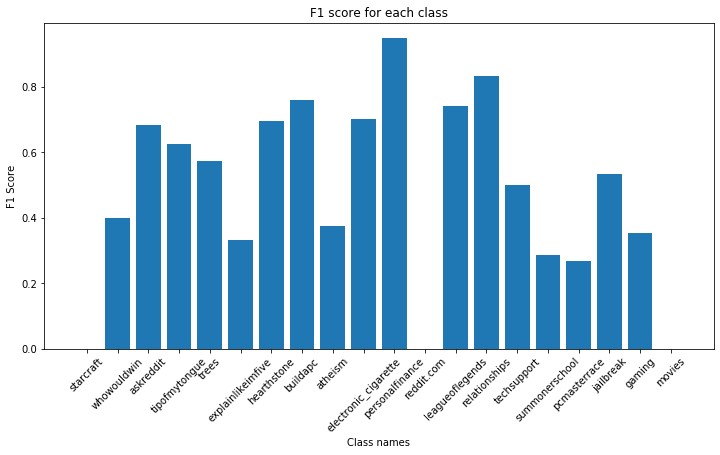

In [0]:
import matplotlib.pyplot as plt

l = []
predict_labels_test = MLP.predict(one_hot_test_features)
l = fbeta_score(predict_labels_test, test_labels, beta = 1, labels = test_labels, average = None)

plt.figure(figsize=(12,6))
plt.title("F1 score for each class")
plt.xlabel("Class names")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.bar(test_labels, l, 0.8)


##Q2




In [0]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(lr_tfidf, param_grid = {'C': [0.001, 0.01, 0.1, 1,10,100,1000,10000,100000]}, n_jobs=-1, verbose=1, scoring='f1_macro', cv=2)

grid_search.fit(tfidf_train_features, train_labels)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
print(best_parameters['C'])



Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   27.0s finished


Best score: 0.463
Best parameters set:
100000


In [0]:
from sklearn.metrics import log_loss

lr_tfidf = LogisticRegression(solver='saga',C=100000)
log_loss_sum_1 = []
for i in [None, 100, 1000, 3000, 5000, 10000, 15000, 30000, 50000]:
  prediction_pipeline_tfidf = Pipeline([
          ('union', FeatureUnion(
            transformer_list=[
              ('text', Pipeline([
                ('selector', ItemSelector(key='title')),
                ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True, max_features = i)), 
                ])),
              ('all_posts_bodies', Pipeline([
                ('selector', ItemSelector(key='all_posts_bodies')),
                ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True, max_features = i)), 
                ])),
              ('all_posts_ids', Pipeline([
                ('selector', ItemSelector(key='all_posts_ids')),
                ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True, max_features = i)), 
                ])),
          ])
          )
          
      ])
  
  tfidf_train_features = prediction_pipeline_tfidf.fit_transform(train_threads)
  tfidf_validation_features = prediction_pipeline_tfidf.transform(validation_threads)
  tfidf_test_features = prediction_pipeline_tfidf.transform(test_threads)

  lr_tfidf.fit(tfidf_train_features, train_labels)
  print("For max_features = ",i,"Score is",lr_tfidf.score(tfidf_validation_features, validation_labels))

For max_features =  None Score is 0.6335616438356164
For max_features =  100 Score is 0.3458904109589041
For max_features =  1000 Score is 0.6027397260273972
For max_features =  3000 Score is 0.6267123287671232
For max_features =  5000 Score is 0.6575342465753424
For max_features =  10000 Score is 0.6301369863013698
For max_features =  15000 Score is 0.6335616438356164
For max_features =  30000 Score is 0.6301369863013698
For max_features =  50000 Score is 0.6438356164383562


In [0]:
for i in [True, False]:
  prediction_pipeline_tfidf = Pipeline([
          ('union', FeatureUnion(
            transformer_list=[
              ('text', Pipeline([
                ('selector', ItemSelector(key='title')),
                ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True, max_features =  5000, sublinear_tf=i)), 
                ])),
              ('all_posts_bodies', Pipeline([
                ('selector', ItemSelector(key='all_posts_bodies')),
                ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True, max_features =  5000,sublinear_tf=i)), 
                ])),
              ('all_posts_ids', Pipeline([
                ('selector', ItemSelector(key='all_posts_ids')),
                ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True, max_features =  5000,sublinear_tf=i)), 
                ])),
          ])
          )
          
      ])
  
  tfidf_train_features = prediction_pipeline_tfidf.fit_transform(train_threads)
  tfidf_validation_features = prediction_pipeline_tfidf.transform(validation_threads)
  tfidf_test_features = prediction_pipeline_tfidf.transform(test_threads)

  lr_tfidf.fit(tfidf_train_features, train_labels)
  print("For max_features =  5000, sublinear_tf = ",i,"Score is",lr_tfidf.score(tfidf_validation_features, validation_labels))

For max_features =  5000, sublinear_tf =  True Score is 0.6404109589041096
For max_features =  5000, sublinear_tf =  False Score is 0.6438356164383562


In [0]:
for i in [None,'l1','l2']:
  prediction_pipeline_tfidf = Pipeline([
          ('union', FeatureUnion(
            transformer_list=[
              ('text', Pipeline([
                ('selector', ItemSelector(key='title')),
                ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True, max_features =  10000, sublinear_tf=False, norm = i)), 
                ])),
              ('all_posts_bodies', Pipeline([
                ('selector', ItemSelector(key='all_posts_bodies')),
                ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True, max_features =  10000,sublinear_tf=False, norm = i)), 
                ])),
              ('all_posts_ids', Pipeline([
                ('selector', ItemSelector(key='all_posts_ids')),
                ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True, max_features =  10000,sublinear_tf=False, norm = i)), 
                ])),
          ])
          )
          
      ])
  
  tfidf_train_features = prediction_pipeline_tfidf.fit_transform(train_threads)
  tfidf_validation_features = prediction_pipeline_tfidf.transform(validation_threads)
  tfidf_test_features = prediction_pipeline_tfidf.transform(test_threads)

  lr_tfidf.fit(tfidf_train_features, train_labels)
  print("For max_features =  5000, sublinear_tf = False, norm = ",i,"Score is",lr_tfidf.score(tfidf_validation_features, validation_labels))

For max_features =  5000, sublinear_tf = False, norm =  None Score is 0.6438356164383562
For max_features =  5000, sublinear_tf = False, norm =  l1 Score is 0.5034246575342466
For max_features =  5000, sublinear_tf = False, norm =  l2 Score is 0.636986301369863


In [2]:
prediction_pipeline_tfidf = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('text', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True, max_features =  15000, sublinear_tf=False, norm = None)), 
              ])),
            ('all_posts_bodies', Pipeline([
              ('selector', ItemSelector(key='all_posts_bodies')),
              ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True, max_features =  15000, sublinear_tf=False, norm = None)), 
              ])),
            ('all_posts_ids', Pipeline([
              ('selector', ItemSelector(key='all_posts_ids')),
              ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True, max_features =  15000, sublinear_tf=False, norm = None)), 
              ])),
        ])
        )
        
    ])

tfidf_train_features = prediction_pipeline_tfidf.fit_transform(train_threads)
tfidf_validation_features = prediction_pipeline_tfidf.transform(validation_threads)
tfidf_test_features = prediction_pipeline_tfidf.transform(test_threads)

lr_tfidf = LogisticRegression(solver='saga',C=100000)
lr_tfidf.fit(tfidf_train_features, train_labels)
predict_labels_test = lr_tfidf.predict(tfidf_test_features)

a = score_summary("LR TF-IDF",predict_labels_test, test_labels)
print("Summary on test set")
print(tabulate([a],headers=["Acc","Marco Precision", "Recall", "F1"]))

Evaluating LR TF-IDF
Summary on test set
             Acc    Marco Precision    Recall     F1
---------  -----  -----------------  --------  -----
LR TF-IDF   69.7              0.557     0.758  0.629


Plot a beautiful confusion matrix

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text xticklabel objects>)

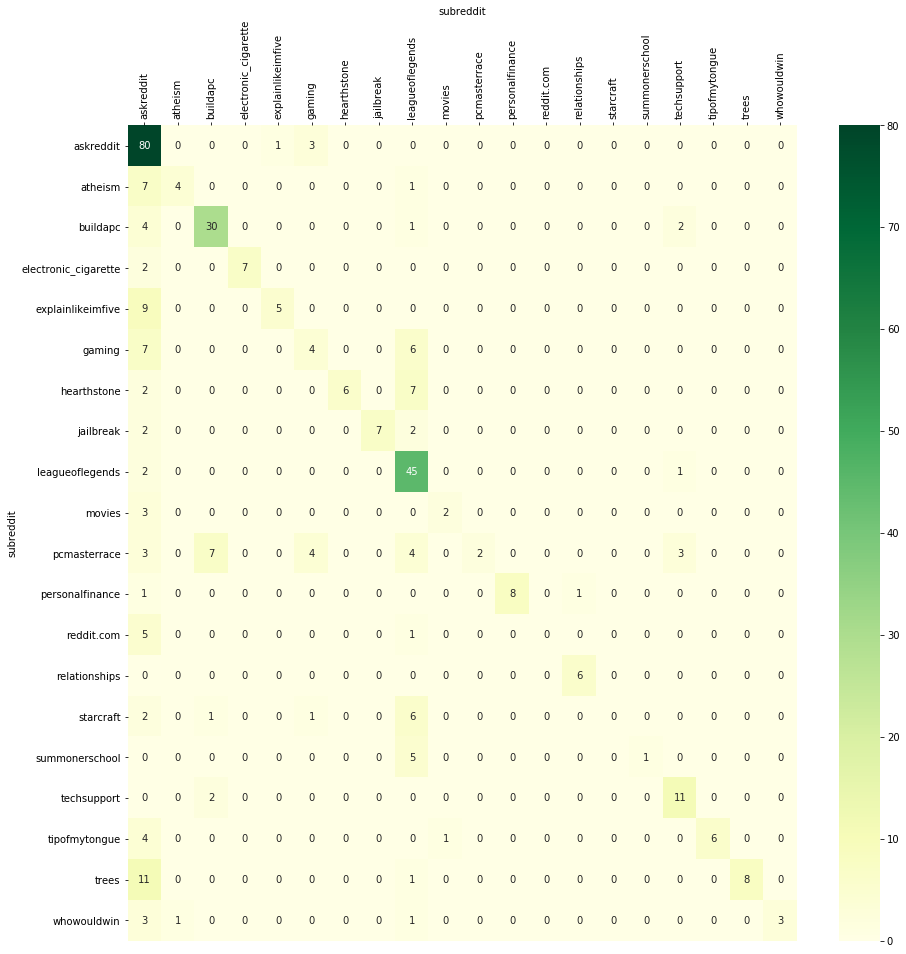

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

cf = confusion_matrix(test_labels, predict_labels_test, labels = test_labels)
cf = pd.DataFrame(cf,index=test_labels,columns=test_labels)
cf = cf.groupby(by=cf.columns, axis=1).sum()
cf = cf.groupby(by=cf.index, axis=0).sum()

plt.figure(figsize=(15,15))
ax = sns.heatmap(cf,annot=True,cmap='YlGn')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
plt.xticks(rotation=90)


## Q3

New features: post depth & is self post

In [0]:
a = np.array(train_threads['all_posts_depths'])
b = np.array(test_threads['all_posts_depths'])
x_1 = []
x_2 = []
for i in a:
  # print(i)
  x_1.append(sum(i))

for i in b:
  # print(i)
  x_2.append(sum(i))

train_threads['all_posts_depths_sum'] = x_1
test_threads['all_posts_depths_sum'] = x_2

# train_threads['is_self_post']
# test_threads['is_self_post']

In [0]:
prediction_pipeline_tfidf = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('text', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True, max_features =  5000, sublinear_tf=False, norm = None)), 
              ])),
            ('all_posts_bodies', Pipeline([
              ('selector', ItemSelector(key='all_posts_bodies')),
              ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True, max_features =  5000, sublinear_tf=False, norm = None)), 
              ])),
            ('all_posts_ids', Pipeline([
              ('selector', ItemSelector(key='all_posts_ids')),
              ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True, max_features =  5000, sublinear_tf=False, norm = None)), 
              ])),
        ])
        )
        
    ])

tfidf_train_features = prediction_pipeline_tfidf.fit_transform(train_threads)
tfidf_test_features = prediction_pipeline_tfidf.transform(test_threads)

In [0]:
tfidf_train_features_P2 = pd.concat([pd.DataFrame.sparse.from_spmatrix(tfidf_train_features),train_threads['all_posts_depths_sum'],train_threads['is_self_post']],axis = 1)
tfidf_test_features_P2 = pd.concat([pd.DataFrame.sparse.from_spmatrix(tfidf_test_features),test_threads['all_posts_depths_sum'],test_threads['is_self_post']],axis=1)
tfidf_train_features_P2.rename(columns={'all_posts_depths_sum':'8318','is_self_post':'8319'})
tfidf_test_features_P2.rename(columns={'all_posts_depths_sum':'8318','is_self_post':'8319'})
tfidf_train_features_P2.fillna(0)
tfidf_test_features_P2.fillna(0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8280,8281,8282,8283,8284,8285,8286,8287,8288,8289,8290,8291,8292,8293,8294,8295,8296,8297,8298,8299,8300,8301,8302,8303,8304,8305,8306,8307,8308,8309,8310,8311,8312,8313,8314,8315,8316,8317,all_posts_depths_sum,is_self_post
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.674182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,3.208446,0.0,0.0,0.0,0.0,1.189385,0.0,0.000000,1.642111,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.189385,0.0,0.000000,1.642111,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.281353,0.0,0.000000,0.0,0.0,0.0,0.0,1.189385,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.189385,0.0,5.287888,1.642111,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.189385,0.0,0.000000,1.642111,0.0,3.58314,0.0,0.0,0.0,5.495527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37,1.0
361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.189385,0.0,0.000000,1.642111,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.0
362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.189385,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,1.0
363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,3.208446,0.0,0.0,0.0,0.0,1.189385,0.0,0.000000,1.642111,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1.0


In [7]:
lr_tfidf = LogisticRegression(solver='saga',C=100000)
lr_tfidf.fit(tfidf_train_features, train_labels)
predict_labels_test = lr_tfidf.predict(tfidf_test_features)

a = score_summary("LR TF-IDF(plus 2 features)",predict_labels_test, test_labels)
print("LR TF-IDF(plus 2 features) summary on test set")
print(tabulate([a],headers=["Acc","Marco Precision", "Recall", "F1"]))

Evaluating LR TF-IDF(plus 2 features)
LR TF-IDF(plus 2 features) summary on test set
                              Acc    Marco Precision    Recall     F1
--------------------------  -----  -----------------  --------  -----
LR TF-IDF(plus 2 features)  0.701              0.556     0.759  0.653


# Part B: Discourse prediction #

## Data preparing ##

In [0]:
discourse_train = "coursework_discourse_train.json"
discourse_test = "coursework_discourse_test.json"
  
!gsutil cp gs://textasdata/coursework/coursework_discourse_train.json $discourse_train  
!gsutil cp gs://textasdata/coursework/coursework_discourse_test.json  $discourse_test

Copying gs://textasdata/coursework/coursework_discourse_train.json...
- [1 files][ 60.2 MiB/ 60.2 MiB]                                                
Operation completed over 1 objects/60.2 MiB.                                     
Copying gs://textasdata/coursework/coursework_discourse_test.json...
/ [1 files][ 15.1 MiB/ 15.1 MiB]                                                
Operation completed over 1 objects/15.1 MiB.                                     


In [0]:
# The reddit thread structure is nested with posts in a new content.
# This block reads the file as json and creates a new data frame.
import pandas as pd
import json

def load_posts(file):
  # A temporary variable to store the list of post content.
  posts_tmp = list()

  with open(file) as jsonfile:
    for i, line in enumerate(jsonfile):
     # if (i > 2): break
      thread = json.loads(line)
      for post in thread['posts']:
        # NOTE: This should be changed to use additional features from the post or thread.
        # DO NOT change the labels for the test set.
        posts_tmp.append((thread['subreddit'], thread['title'], thread['url'],
                        post['id'], post.get('author', ""), post.get('body', ""), post.get("majority_link", ""), 
                        post.get('post_depth', 0), post.get('majority_type', ""), # discourse type label 
                        post.get('in_reply_to', "") ))

# Create the posts data frame.  
  labels = ['subreddit', 'title', 'url', 'id', 'author', 'body', 'majority_link', 
          'post_depth', 'discourse_type', 'in_reply_to']
  return pd.DataFrame(posts_tmp, columns=labels)

In [0]:
original_train_posts = load_posts(discourse_train)
# Filter out empty labels
original_train_posts = original_train_posts[original_train_posts['discourse_type'] != ""]
print(original_train_posts.head())
print("Num posts: ", len(original_train_posts))

    subreddit                           title  ... discourse_type in_reply_to
0  worldofpvp  Help me decide my new PvP main  ...       question            
1  worldofpvp  Help me decide my new PvP main  ...         answer   t3_2v0anq
2  worldofpvp  Help me decide my new PvP main  ...         answer   t3_2v0anq
3  worldofpvp  Help me decide my new PvP main  ...         answer   t3_2v0anq
4  worldofpvp  Help me decide my new PvP main  ...         answer   t3_2v0anq

[5 rows x 10 columns]
Num posts:  79267


### Development / Validation data ###

For part B it is up to you to split the "original" training data into a new train/validation (development) dataset appropriately. See Lab 4 for an example. 

In [0]:
from sklearn.model_selection import train_test_split


train_dataset_B, validation_dataset_B, train_labels_B, validation_labels_B = train_test_split(original_train_posts, original_train_posts['discourse_type'], test_size=0.25, random_state=1)

train_posts = train_dataset_B
validation_posts = train_posts.sample(frac=1).iloc[:10000,:]
# validation_posts = validation_dataset_B

print("Num train_posts: ", len(train_posts))
print("Num validation_posts: ", len(validation_posts))

Num train_posts:  59450
Num validation_posts:  10000


### Test data ###

In [0]:
test_posts = load_posts(discourse_test)
# Filter out empty labels
test_posts = test_posts[test_posts['discourse_type'] != ""]

### Labels ###

The label for the post we will be predicting is in the discourse_type column.

In [0]:
train_labels = train_posts['discourse_type']
validation_labels = validation_posts['discourse_type']
test_labels = test_posts['discourse_type']

Examine the distribution over labels on the training data.

In [0]:
discourse_counts = original_train_posts['discourse_type'].value_counts()
print(discourse_counts.describe())

top_discourse = discourse_counts.nlargest(20)
print(top_discourse)

count       10.000000
mean      7926.700000
std       9664.321866
min       1266.000000
25%       1671.500000
50%       3235.500000
75%      11919.750000
max      31419.000000
Name: discourse_type, dtype: float64
answer              31419
elaboration         14775
question            13610
appreciation         6849
agreement            3868
disagreement         2603
humor                1787
other                1633
announcement         1457
negativereaction     1266
Name: discourse_type, dtype: int64


##Q4

In [0]:
train_posts

,subreddit,title,url,id,author,body,majority_link,post_depth,discourse_type,in_reply_to
10345,destinythegame,"In case you weren't aware, Sealed Ahamkara Gra...",https://www.reddit.com/r/DestinyTheGame/commen...,t1_czgd3bx,DunderMifflinPaper,Yep! I think the sealed grasps have about a 50...,t1_czgd09s,4,answer,t1_czgd09s
46920,stopdrinking,Six Months.,https://www.reddit.com/r/stopdrinking/comments...,t1_ck9u6cc,ginger_sprout,Here's to SIX MONTHS of waking up sober!! Gett...,t3_2fivlm,1,appreciation,t3_2fivlm
54069,heroesofthestorm,Zeratul Key Giveaway,https://www.reddit.com/r/heroesofthestorm/comm...,t1_ct0jgqi,Howlf,"Ok, a hint, it's BLOODY!",t3_3czy6j,1,elaboration,t3_3czy6j
18306,leagueoflegends,Diamond Jungler LFT,https://www.reddit.com/r/leagueoflegends/comme...,t1_cactx2q,Respawning,I'm on my phone I can't link. On the side bar ...,t1_cactkmb,3,answer,t1_cactkmb
42159,writing,"21,000 downloads at Amazon in November! It see...",https://www.reddit.com/r/writing/comments/mwyo...,t1_c34iho5,Arkelias,Congratualtions! This is very encouraging to ...,t3_mwyo7,1,appreciation,t3_mwyo7
...,...,...,...,...,...,...,...,...,...,...
23887,oblivion,New to Oblivion (Skyrim was the first ES game ...,https://www.reddit.com/r/oblivion/comments/1qp...,t1_cdht0pp,Alaira314,I'm currently re-playing oblivion with a steal...,t1_cdf25h9,3,elaboration,t1_cdf25h9
81867,marvelheroes,Deadpool ranged or physical pros and cons,https://www.reddit.com/r/marvelheroes/comments...,t1_d3hp4vm,luti01,"Played both, Ranged is better. Damage is almos...",t3_4kkzz6,1,answer,t3_4kkzz6
55959,japancirclejerk,Our lord and savior fighting the good fight ag...,https://www.reddit.com/r/japancirclejerk/comme...,t1_csrlefv,bulldogdiver,Contrary to what you might have read the bar i...,t1_csrkd6r,2,answer,t1_csrkd6r
5825,parenting,Anyone else here struggle with postpartum depr...,https://www.reddit.com/r/Parenting/comments/1t...,t1_ce638k1,McMamaFace,"Oh wow, that's awesome that your mind/body sna...",t1_ce62duz,2,appreciation,t1_ce62duz


In [0]:
import time 
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

prediction_pipeline_tfidf = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('titles', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True, sublinear_tf=True)), 
              ])),
            ('bodies', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True, sublinear_tf=True)), 
              ])),
            ('authors', Pipeline([
              ('selector', ItemSelector(key='author')),
              ('tf_idf', TfidfVectorizer(tokenizer=tokenize_normalize, binary=True, sublinear_tf=True)), 
              ])),
        ])
        )
    ])
start = time.time()
tfidf_train_features_B = prediction_pipeline_tfidf.fit_transform(train_posts)
end = time.time()
print(end-start)

start = time.time()
tfidf_validation_features_B = prediction_pipeline_tfidf.transform(validation_posts)
end = time.time()
print(end-start)

start = time.time()
tfidf_test_features_B = prediction_pipeline_tfidf.transform(test_posts)
end = time.time()
print(end-start)

1039.010130405426
168.446222782135
328.2619912624359


Baseline dummy model

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

dummy_stratified_B = DummyClassifier(strategy='stratified')
dummy_stratified_B.fit(tfidf_train_features_B, train_labels)
predict_labels_test_B = dummy_stratified_B.predict(tfidf_test_features_B)

a = score_summary("Dummy model with stratified strategy",predict_labels_test_B, test_labels)
print("Dummy model with stratified strategy summary on test set")
print(tabulate([a],headers=["Acc","Marco Precision", "Recall", "F1"]))

Evaluating Dummy model with stratified strategy
Dummy model with stratified strategy summary on test set
                                        Acc    Marco Precision    Recall     F1
------------------------------------  -----  -----------------  --------  -----
Dummy model with stratified strategy   0.24              0.104     0.104  0.104


Linear regression model

In [0]:
lr_tfidf_B = LogisticRegression(penalty='l2',solver='saga',C=10)
lr_tfidf_B.fit(tfidf_train_features_B, train_labels)
predict_labels_test_B = lr_tfidf_B.predict(tfidf_test_features_B)

a = score_summary("LR TF-IDF",predict_labels_test_B, test_labels)
print("LR TF-IDF summary on test set")
print(tabulate([a],headers=["Acc","Marco Precision", "Recall", "F1"]))

Evaluating LR TF-IDF
LR TF-IDF summary on test set
             Acc    Marco Precision    Recall     F1
---------  -----  -----------------  --------  -----
LR TF-IDF  0.474               0.25     0.355  0.271


Text(114.0, 0.5, 'actual_discourse_type')

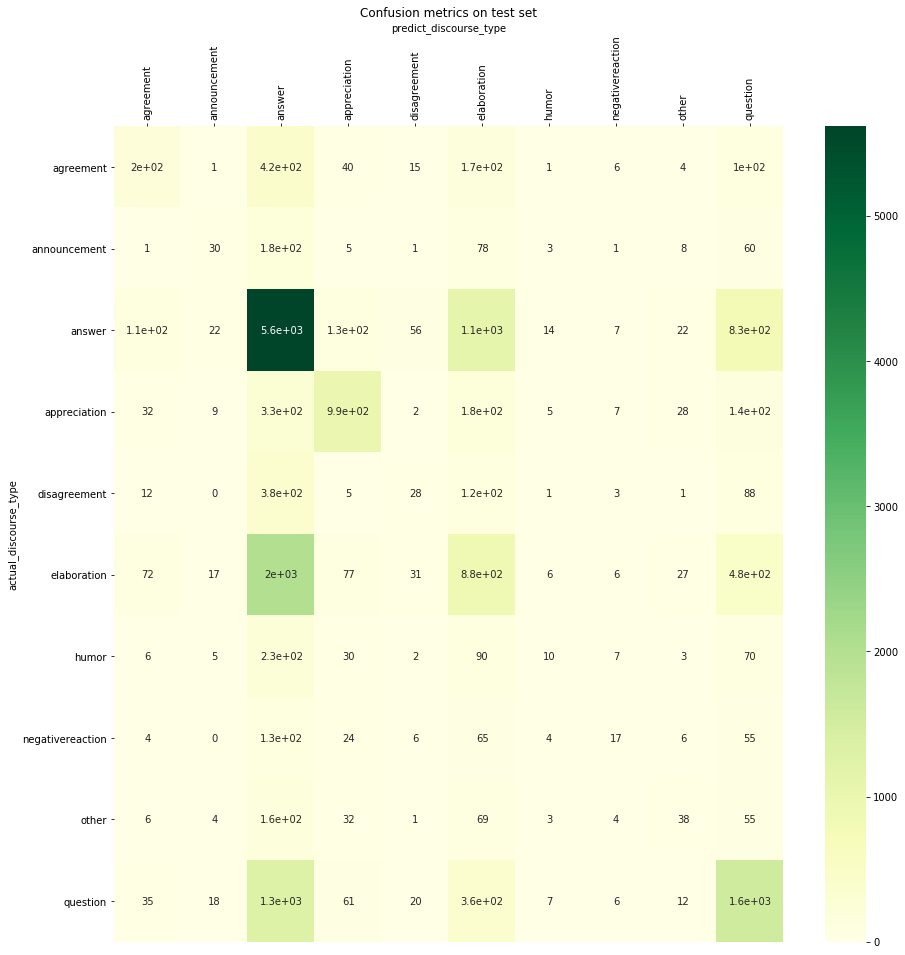

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

cf_B = confusion_matrix(test_labels, predict_labels_test_B, labels = test_labels)
cf_B = pd.DataFrame(cf_B,index=test_labels,columns=test_labels)
cf_B = cf_B.groupby(by=cf_B.columns, axis=1).sum()
cf_B = cf_B.groupby(by=cf_B.index, axis=0).sum()

plt.figure(figsize=(15,15))
ax = sns.heatmap(cf_B,annot=True,cmap='YlGn')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
plt.title("Confusion metrics on test set")
plt.xticks(rotation=90)
plt.xlabel("predict_discourse_type")
plt.ylabel("actual_discourse_type")

For each class

In [0]:
each_class_sum = []
predict_each_class_sum = []
for discourse in cf_B:
  i = 0
  each_class_sum_tmp = []
  for tmp in test_labels:
    if(tmp == discourse):
      each_class_sum_tmp.append(1)
    else:
      each_class_sum_tmp.append(0)
  each_class_sum.append(each_class_sum_tmp)

  predict_each_class_sum_tmp = []
  for tmp in predict_labels_test_B:
    if(tmp == discourse):
      predict_each_class_sum_tmp.append(1)
    else:
      predict_each_class_sum_tmp.append(2)
  predict_each_class_sum.append(predict_each_class_sum_tmp)

In [0]:
print("For each class")
k = 0
all_class = []
for i in cf_B:
  a = score_summary(i,predict_each_class_sum[k], each_class_sum[k])
  k += 1
  all_class.append(a)

pd.DataFrame(all_class,index=cf_B.columns.values,columns=["Class_Name","Acc","Marco_Precision", "Recall", "F1"])
# print(tabulate([all_class],headers=["class","Acc","Marco Precision", "Recall", "F1"]))

For each class
Evaluating agreement
Evaluating announcement
Evaluating answer
Evaluating appreciation
Evaluating disagreement
Evaluating elaboration
Evaluating humor
Evaluating negativereaction
Evaluating other
Evaluating question


,Class_Name,Acc,Marco_Precision,Recall,F1
agreement,agreement,0.010,0.069,0.139,0.093
announcement,announcement,0.002,0.027,0.094,0.042
answer,answer,0.283,0.236,0.174,0.200
appreciation,appreciation,0.050,0.192,0.237,0.212
disagreement,disagreement,0.001,0.015,0.058,0.023
elaboration,elaboration,0.044,0.081,0.093,0.086
humor,humor,0.001,0.007,0.062,0.013
negativereaction,negativereaction,0.001,0.018,0.089,0.031
other,other,0.002,0.034,0.085,0.048
question,question,0.080,0.155,0.153,0.154


performance on validation set

In [0]:
predict_labels_validation_B = lr_tfidf_B.predict(tfidf_validation_features_B)

a = score_summary("LR TF-IDF",predict_labels_validation_B, validation_labels)
print("LR TF-IDF summary on validation set")
print(tabulate([a],headers=["Acc","Marco Precision", "Recall", "F1"]))

Evaluating LR TF-IDF
LR TF-IDF summary on validation set
             Acc    Marco Precision    Recall     F1
---------  -----  -----------------  --------  -----
LR TF-IDF  0.983              0.978     0.989  0.983


In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE


print("The 20 most important features column indexs and their coef")
pd.DataFrame(pd.DataFrame(lr_tfidf_B.coef_).mean().sort_values(ascending=False)[:20])



The 20 most important features column indexs and their coef


,0
40270,1.391554e-13
73085,7.822631e-14
13148,7.034373e-14
34991,6.772360e-14
67331,5.853096e-14
38454,4.480860e-14
66421,3.983480e-14
36672,3.816947e-14
72938,3.508305e-14
62475,3.400613e-14


In [0]:

k = 0
x_1 = []
x_2 = []
for i in cf_B:
  x_1.append(pd.DataFrame(lr_tfidf_B.coef_).iloc[k].max())
  x_2.append(pd.DataFrame(lr_tfidf_B.coef_).iloc[k].idxmax())
  k += 1

classes_important_features = pd.DataFrame(x_1,index=cf_B.columns.values,columns=['coef_'])
classes_important_features['feature_index'] = x_2
classes_important_features

,coef_,feature_index
agreement,17.352779,14141
announcement,6.985276,85835
answer,4.950897,72996
appreciation,20.455450,66421
disagreement,9.608753,27286
elaboration,4.514348,10518
humor,4.266115,1846
negativereaction,5.052754,33522
other,5.385903,4520
question,9.965799,37899


## Q5 ##

Title, body and author fileds are used
New features are: 

1.   Subreddit 
2.   A binary feature for whether the current author is also the author of the initial post
3.   Post depth
4.   Content of previous posts(find from the original_train_posts)
5.   Sentiment analysis score of sentences / post (from a sentiment classifier or Vader)



### Feature 1 pre-processing ###

In [0]:
feature_1 = TfidfVectorizer(tokenizer=tokenize_normalize, max_features=955).fit_transform(train_posts['subreddit'])
feature_1_test = TfidfVectorizer(tokenizer=tokenize_normalize, max_features=955).fit_transform(test_posts['subreddit'])
train_posts['subreddit']

10345      destinythegame
46920        stopdrinking
54069    heroesofthestorm
18306     leagueoflegends
42159             writing
               ...       
23887            oblivion
81867        marvelheroes
55959     japancirclejerk
5825            parenting
86721          bloodborne
Name: subreddit, Length: 59450, dtype: object

### Feature 2 pre-processing ###

In [0]:
# compare field 'id' and 'majority_link', if the same, then append 1 to it
train_posts['original_author_or_not'] = train_posts['id'] == train_posts['majority_link']
train_posts['original_author_or_not'] = train_posts['original_author_or_not'].replace(True,1)
train_posts['original_author_or_not'] = train_posts['original_author_or_not'].replace(False,0)
feature_2 = train_posts['original_author_or_not']

test_posts['original_author_or_not'] = test_posts['id'] == test_posts['majority_link']
test_posts['original_author_or_not'] = test_posts['original_author_or_not'].replace(True,1)
test_posts['original_author_or_not'] = test_posts['original_author_or_not'].replace(False,0)
feature_2_test = test_posts['original_author_or_not']

train_posts['original_author_or_not']

10345    0.0
46920    0.0
54069    0.0
18306    0.0
42159    0.0
        ... 
23887    0.0
81867    0.0
55959    0.0
5825     0.0
86721    0.0
Name: original_author_or_not, Length: 59450, dtype: float64

### Feature 3 pre-processing ###

In [0]:
feature_3 = train_posts['post_depth']
feature_3_test = test_posts['post_depth']
train_posts['post_depth']

10345    4
46920    1
54069    1
18306    3
42159    1
        ..
23887    3
81867    1
55959    2
5825     2
86721    1
Name: post_depth, Length: 59450, dtype: int64

### Feature 4 pre-processing ###

In [0]:
temp_post = []
temp_list = original_train_posts.reset_index(drop=False)

# Since the training dataset is random, so in order to find the previous post
# find the post in the training dataset, and then find it in the original dataset, return its index-1 to find its previous post 
for post in train_posts.index.values.tolist():
  if(post!=0):
    temp_post.append(temp_list['body'][int(temp_list.loc[temp_list['index'] == post].index.values) - 1])
  else:
    temp_post.append('')

train_posts['previous_post_body'] = temp_post
train_posts['previous_post_body']

10345    Wait, *what?* I joke about this all the time. ...
46920                                Congrats on 6 months!
54069                                Cromartie High School
18306               okay were is that i cant find it sorry
42159    I published my book at Amazon in May and by Oc...
                               ...                        
23887    Just try to enjoy the game. There's going to b...
81867    I've had a lot of success with melee character...
55959     How did this guy even become a Japanese national
5825     I did too. I'm pretty close with my own mom, a...
86721    Kill 5 vermin and go there valtr will be gone ...
Name: previous_post_body, Length: 59450, dtype: object

In [0]:
temp_post = []
temp_list = test_posts.reset_index(drop=False)

# For test dataset
for post in test_posts.index.values.tolist():
  if(post!=0):
    temp_post.append(temp_list['body'][int(temp_list.loc[temp_list['index'] == post].index.values) - 1])
  else:
    temp_post.append('')

# any(temp_list.loc[temp_list['index'] == 45].index.values) == False
test_posts['previous_post_body'] = temp_post
test_posts['previous_post_body']

0                                                         
1        Edit: I'm in the Oklahoma City and Tulsa Oklah...
2        are you in the USA?  i would say that unless t...
3                                                [deleted]
4        Great info! It shows that stopping on a highwa...
                               ...                        
22092                                        Wow, awesome!
22093    I find the habit of removing requests on here ...
22094    Perhaps I should have made a comment that "wor...
22095               This is absolutely amazing! Well done!
22096    You are very kind. Thanks very much. Appears O...
Name: previous_post_body, Length: 19812, dtype: object

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
import time 

start = time.time()
feature_4 = TfidfVectorizer(tokenizer=tokenize_normalize, max_features=34163).fit_transform(train_posts['previous_post_body'])
print(time.time() - start)

489.32326912879944


In [0]:
start = time.time()
feature_4_test = TfidfVectorizer(tokenizer=tokenize_normalize, max_features=34163).fit_transform(test_posts['previous_post_body'])
print(time.time() - start)

168.74183797836304


### Feature 5 pre-processing ###

In [0]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 22.2MB/s 


In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

def sentiment_a(post_in):
  sentences = list(post_in['body'])
  analyzer = SentimentIntensityAnalyzer()
  pos, compound, neu, neg = [],[],[],[]

  # use Vader to give each sentence's sentiment score on different emotion
  for sentence in tqdm(sentences):
      vs = analyzer.polarity_scores(sentence)
      pos.append(vs['pos'])
      compound.append(vs['compound'])
      neu.append(vs['neu'])
      neg.append(vs['neg'])
  return pos,compound,neu,neg

pos,compound,neu,neg = sentiment_a(train_posts)
pos_test,compound_test,neu_test,neg_test = sentiment_a(test_posts)

100%|██████████| 19812/19812 [00:15<00:00, 1263.75it/s]


In [0]:
def sentiment_score(set_name,pos,compound,neu,neg):
  a = pd.DataFrame(columns=['original_id','pos','compound','neu','neg'])
  sentences_id = set_name.index.values.tolist()
  a['original_id'] = sentences_id
  a['pos'] = pos
  a['compound'] = compound
  a['neu'] = neu
  a['neg'] = neg
  return a.set_index('original_id')

feature_5 = sentiment_score(train_posts,pos,compound,neu,neg)
feature_5_test = sentiment_score(test_posts,pos_test,compound_test,neu_test,neg_test)
feature_5

,pos,compound,neu,neg
original_id,,,,
10345,0.187,0.8172,0.813,0.000
46920,0.235,0.9165,0.765,0.000
54069,0.271,-0.4069,0.246,0.483
18306,0.065,0.2700,0.871,0.064
42159,0.356,0.8012,0.644,0.000
...,...,...,...,...
23887,0.042,-0.1928,0.894,0.064
81867,0.192,0.7834,0.675,0.133
55959,0.163,0.4449,0.837,0.000


### Fit & evaluate the model ###

In [0]:
import scipy
from scipy.sparse import csr_matrix, hstack

# convert dataframe features into sparse matrix
feature_1_spa_matrix = feature_1
feature_2_spa_matrix = scipy.sparse.csr_matrix(feature_2).transpose()
feature_3_spa_matrix = scipy.sparse.csr_matrix(feature_3).transpose()
feature_4_spa_matrix = feature_4
feature_5_spa_matrix = scipy.sparse.csr_matrix(feature_5)

# convert dataframe features for testing into sparse matrix
feature_1_spa_matrix_test = feature_1_test
feature_2_spa_matrix_test = scipy.sparse.csr_matrix(feature_2_test).transpose()
feature_3_spa_matrix_test = scipy.sparse.csr_matrix(feature_3_test).transpose()
feature_4_spa_matrix_test = feature_4_test
feature_5_spa_matrix_test = scipy.sparse.csr_matrix(feature_5_test)

# concat the 5 new features, then combine it with features used for training Q4 model
combined_features_temp = hstack([feature_1_spa_matrix,feature_2_spa_matrix,feature_3_spa_matrix,feature_4_spa_matrix,feature_5_spa_matrix])
combined_features = hstack([tfidf_train_features_B, combined_features_temp])

combined_features_test = hstack([tfidf_test_features_B, feature_1_spa_matrix_test, feature_2_spa_matrix_test, feature_3_spa_matrix_test, feature_4_spa_matrix_test, feature_5_spa_matrix_test])


In [0]:
lr_tfidf_Q5 = LogisticRegression(penalty='l2',solver='saga',C=10)
lr_tfidf_Q5.fit(combined_features, train_labels)
predict_labels_test_Q5 = lr_tfidf_Q5.predict(combined_features_test)

a = score_summary("LR TF-IDF Q5",predict_labels_test_Q5, test_labels)
print("LR TF-IDF Q5 summary on test set")
print(tabulate([a],headers=["Acc","Marco Precision", "Recall", "F1"]))

Evaluating LR TF-IDF Q5
LR TF-IDF Q5 summary on test set
                Acc    Marco Precision    Recall    F1
------------  -----  -----------------  --------  ----
LR TF-IDF Q5  0.522               0.29     0.418  0.32


Text(159.0, 0.5, 'actual_discourse_type')

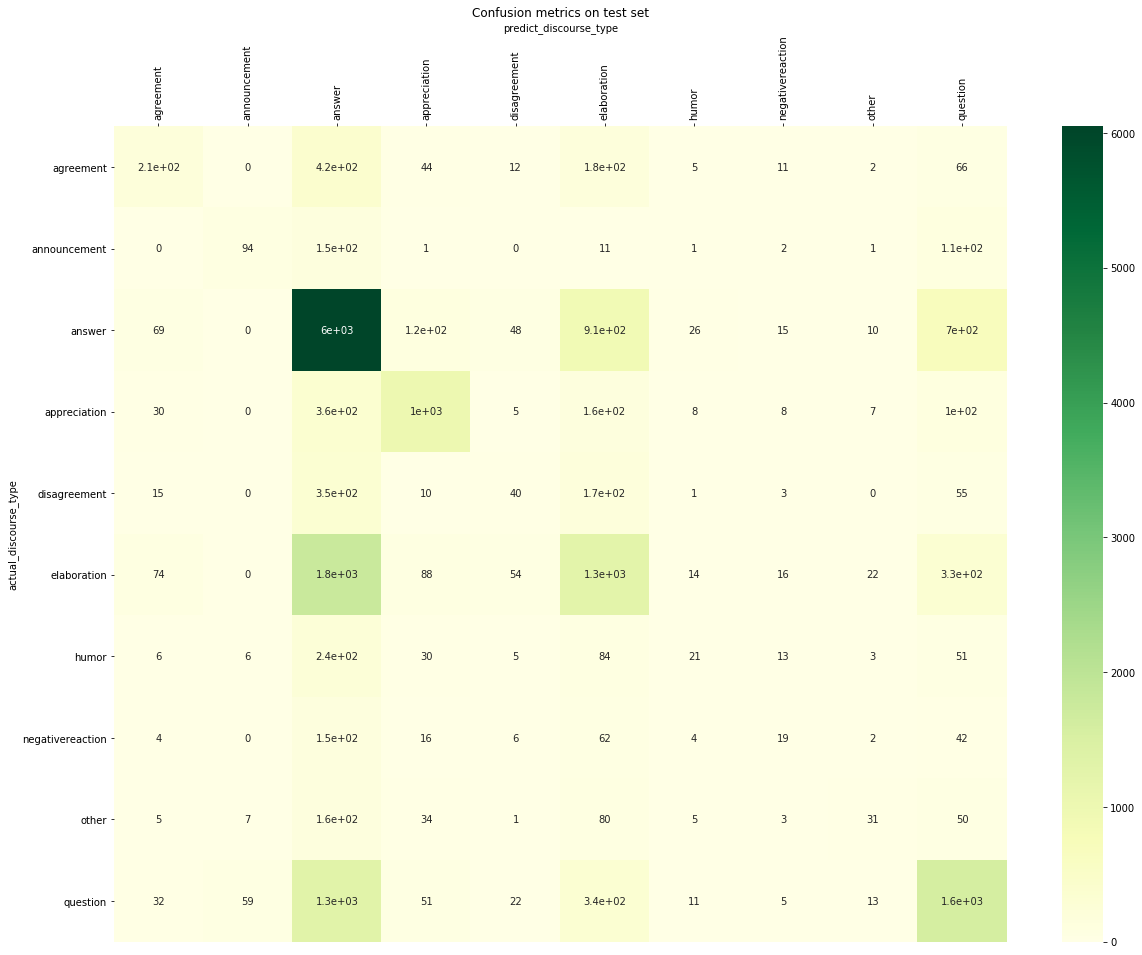

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

cf_Q5 = confusion_matrix(test_labels, predict_labels_test_Q5, labels = test_labels)
cf_Q5 = pd.DataFrame(cf_Q5,index=test_labels,columns=test_labels)
cf_Q5 = cf_Q5.groupby(by=cf_Q5.columns, axis=1).sum()
cf_Q5 = cf_Q5.groupby(by=cf_Q5.index, axis=0).sum()

plt.figure(figsize=(20,15))
ax = sns.heatmap(cf_Q5,annot=True,cmap='YlGn')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
plt.title("Confusion metrics on test set")
plt.xticks(rotation=90)
plt.xlabel("predict_discourse_type")
plt.ylabel("actual_discourse_type")

For different features, the indeies are as following:

*   3 old features: [0 , 100499)
*   new feature 1:  [100499, 101454)
*   new feature 2:  101454
*   new feature 3:  101455
*   new feature 4:  [101456, 135619)
*   new feature 5:  [135619, 135622)



In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE


all_features = pd.DataFrame(pd.DataFrame(lr_tfidf_Q5.coef_).mean(),columns=['coef_'])
feature_1_coef = ['feature 1', all_features[100500:101455].mean()[0]]
feature_2_coef = ['feature 2', all_features[101455:101456].mean()[0]]
feature_3_coef = ['feature 3', all_features[100456:101457].mean()[0]]
feature_4_coef = ['feature 4', all_features[101457:135620].mean()[0]]
feature_5_coef = ['feature 5', all_features[135620:135623].mean()[0]]
pd.DataFrame([feature_1_coef,feature_2_coef,feature_3_coef,feature_4_coef,feature_5_coef],columns=['feature name','coef']).sort_values(by=['coef'], ascending=False)



,feature name,coef
0,feature 1,-1.216129e-16
3,feature 4,-1.693821e-16
2,feature 3,-4.872826e-15
4,feature 5,-1.507287e-13
1,feature 2,-4.758799e-12
